In [ ]:
# Reading the data
from google.colab import files
uploaded = files.upload()

Saving RCA_V3.csv to RCA_V3.csv


In [ ]:
import pandas as pd
import numpy as np

# Drop unnecessary columns and rename cols
# Assuming we need only 'text' and 'label' columns
data = (pd.read_csv('RCA_V3.csv',sep=None,engine='python', usecols = ['RCA_Main_Root_Cause','RCA Defect Domain'])).dropna(how='all')
data.columns = ['text', 'label']
data.head()
print(data)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check data shape
print("Data shape:", data.shape)


                                                    text        label
0      Parking position handling was not well address...       Design
1                       The SDS of WH was not up-to-date       Design
2                 Direct use of a trace definition file.  Integration
3                 Patch too old, not traceable any more.  Integration
4      Clearmake does not remove already build obsole...  Integration
...                                                  ...          ...
10735                                         SW design.       Design
10736                                         SW design.       Design
10737  A DDF timeout is not reported by the CN facili...  Realization
10738  Automated regression does not capture the impa...       Design
10739  The combination of file sizes, number of scann...        Other

[10521 rows x 2 columns]
Missing values:
 text     316
label    264
dtype: int64
Data shape: (10521, 2)


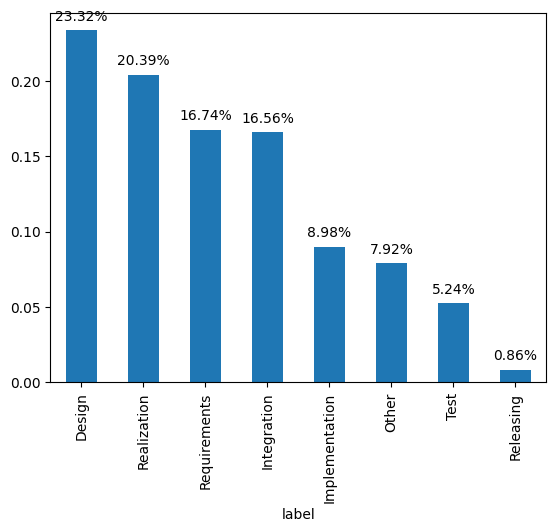

In [ ]:
# check target balance

import matplotlib.pyplot as plt

value_counts = data['label'].value_counts(normalize=True)

ax = value_counts.plot.bar()

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [ ]:

#Feature Engineering

from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the text data
# Remove any missing values
data.dropna(subset=['text', 'label'], inplace=True)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['text'])
y = data['label']
print("Data shape:", X)
print("Data shape:", y)

Data shape:   (0, 224)	0.39599535526390967
  (0, 374)	0.5918541660485911
  (0, 652)	0.702065755282464
  (1, 982)	1.0
  (2, 324)	0.48873155702439586
  (2, 212)	0.7132324236539913
  (2, 950)	0.502435045570234
  (3, 590)	0.8526367177897295
  (3, 623)	0.5225041889561816
  (4, 883)	0.5423132630063968
  (4, 84)	0.4745364034725109
  (4, 717)	0.5796371358698067
  (4, 253)	0.38043700827781785
  (5, 744)	0.39138858374665103
  (5, 455)	0.4567402172217944
  (5, 865)	0.4694915872142963
  (5, 253)	0.3865668420709456
  (5, 950)	0.39270175759960557
  (5, 224)	0.33783488009596746
  (6, 897)	0.3954366134902626
  (6, 205)	0.5863466605636641
  (6, 886)	0.5674792096810924
  (6, 895)	0.42165723631513136
  (7, 869)	0.551639737693595
  (7, 534)	0.6345313849744311
  :	:
  (9938, 82)	0.4292510475749038
  (9938, 307)	0.3873457547748635
  (9939, 101)	0.28367794783542216
  (9939, 184)	0.27747174228840343
  (9939, 96)	0.3047341570286495
  (9939, 55)	0.26357305096333994
  (9939, 739)	0.2608615771772493
  (9939, 398)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Use a small sample for SHAP explanations to save time and resources
sample_size = 1000
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]

# Create an explainer for the model using KernelExplainer
def predict_fn(X):
    return model.predict(X).flatten()

background = X_train[:100]
explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(X_sample, nsamples=100)

# Get feature names correctly
feature_names = [tokenizer.index_word.get(i, f'word_{i}') for i in range(1, len(tokenizer.index_word) + 1)]

# Summary Plot
shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

# Dependence Plot for a specific feature
feature_index = 7  # Replace with the feature index you're interested in
shap.dependence_plot(feature_index, shap_values, X_sample, feature_names=feature_names)

# Force Plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_sample[0], feature_names=feature_names)



ModuleNotFoundError: No module named 'shap'

In [ ]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
# Create Feature and Label sets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df = pd.DataFrame(data)
df = df.dropna(subset=['label'])

data.reset_index(drop=True, inplace=True)
# Encode labels to integers
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

X = df['text']
Y = df['label_encoded']

# Train-test split (67% train - 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=123)


print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)


In [ ]:
#Model Evaluation
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


In [ ]:
#Deployment
import joblib

# Save the model
joblib.dump(model, 'text_classification_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Load the model (for future use)
# model = joblib.load('text_classification_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=100)

# Prepare labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['label'])


In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.utils import to_categorical


# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len)
print(tokenizer.word_index)
print(sequences)
#print(tokenizer)

# Convert labels to one-hot encoding
label_dict = {label: i for i, label in enumerate(set(Y))}
labels_encoded = [label_dict[label] for label in Y]
one_hot_labels = to_categorical(labels_encoded)
print(one_hot_labels)

In [ ]:
# Model Building
# Build and compile a CNN model for text classification.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Build the CNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')  # Use 'softmax' and adjust units for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.datasets import make_classification
from shap import Explainer, Explanation, waterfall_plot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(1000, 100, n_informative=9, n_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = Explainer(model)
sv = explainer(X_train)
feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]  # Adjust the format of feature names if needed

exp = Explanation(sv[:,:,6], sv.base_values[:,6], X_train, feature_names=feature_names)
idx = 7 # datapoint to explain

print("Length of feature_names:", len(feature_names))
print("Length of shap_values:", len(sv))
print("Length of exp:", len(exp))
print("Shape of sv:", sv.shape)

# Ensure idx is within bounds
if idx < len(exp):
    waterfall_plot(exp[idx])
else:
    print("Index out of range.")

In [ ]:
#Model Training
#Train the CNN model.
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
#Model Evaluation
#Evaluate the trained CNN model.
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

In [ ]:
pip install pandas scikit-learn tensorflow shap


In [ ]:
pip install --upgrade shap

In [ ]:
#SHAP Explanation
#Use SHAP to explain the CNN model's predictions.
import shap

# Use a small sample for SHAP explanations to save time and resources
sample_size = 100
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train[:100])  # Use a subset of training data for background
shap_values = explainer(X_sample)

# Plot SHAP values for a single prediction
shap.summary_plot(shap_values, X_sample, feature_names=tokenizer.index_word)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import shap

# Disable eager execution for SHAP compatibility
tf.compat.v1.disable_eager_execution()

# Use a small sample for SHAP explanations to save time and resources
sample_size = 100
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]



In [ ]:
pip install pandas scikit-learn tensorflow shap

In [ ]:
# Use a small sample for SHAP explanations to save time and resources
sample_size = 100
X_sample = X_test[:sample_size]
y_sample = y_test[:sample_size]

# Create an explainer for the model using KernelExplainer
def predict_fn(X):
    return model.predict(X).flatten()

background = X_train[:100]
explainer = shap.KernelExplainer(predict_fn, background)
shap_values = explainer.shap_values(X_sample, nsamples=100)

# Summary Plot
shap.summary_plot(shap_values, X_sample, feature_names=[tokenizer.index_word.get(i, f'word_{i}') for i in range(1, 10001)])

# Dependence Plot for a specific feature
feature_index = 1  # Replace with the feature index you're interested in
shap.dependence_plot(feature_index, shap_values, X_sample, feature_names=[tokenizer.index_word.get(i, f'word_{i}') for i in range(1, 10001)])

# Force Plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_sample[0], feature_names=[tokenizer.index_word.get(i, f'word_{i}') for i in range(1, 10001)])

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import shap
import matplotlib.pyplot as plt

# Display the first few rows and column names of the dataset to confirm correct column names
print(data.head())
print(data.columns)

# Correct column names identified from the inspection
root_cause_col = 'RCA_Main_Root_Cause'  # Replace with the actual column name
defect_domain_col = 'RCA Defect Domain'  # Replace with the actual column name


# Convert numpy arrays back to pandas Series
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train an SVM classifier
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_tfidf, y_train)

# Initialize the JS visualization code for SHAP
shap.initjs()

# Use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train_tfidf, link="logit")
shap_values = explainer.shap_values(X_test_tfidf, nsamples=100)

# Plot the SHAP values for the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_tfidf[0,:], link="logit")
plt.show()